\author{Fan Jiang, 11310129}

# Introduction

This document is the solution on FIR filter design for the DSP Autumn 2015 session.

In [1]:
%load_ext oct2py.ipython
%pylab inline
%config InlineBackend.figure_format='retina'

Populating the interactive namespace from numpy and matplotlib


The properties of the windows are listed below:

| Type         | Main lobe   | Relative sidelobe | Minimum stopband | Transition bandwidth | 
|--------------|-------------|-------------------|------------------|----------------------| 
| Rectangular  | $4\pi/(2M+1)$   | 13.3dB            | 20.9dB           | $0.92\pi/M$              | 
| Hann         | $8\pi/(2M+1)$   | 31.5dB            | 43.9dB           | $3.11\pi/M$              | 
| Hamming      | $8\pi/(2M+1)$   | 42.7dB            | 54.5dB           | $3.32\pi/M$              | 
| Blackman     | $12\pi/(2M+1)$  | 58.1dB            | 75.3dB           | $5.56\pi/M$              | 


# MATLAB Practice

## Question 1
Using the windowed Fourier series approach, design a linear-phase FIR lowpass filter with the following specifications:
* passband edge at 3 rad/s
* stopband edge at 5 rad/s
* maximum passband attenuation of 0.3 dB
* minimum stopband attenuation of 40 dB 
* sampling frequency of 15 rad/s

Use each of the following windows for the design: Hamming, Hann, Blackman and Kaiser. Show the impulse response coefficients, and plot the gain response of the designed filters for each. Comment on your results. Do not use the M-file fir1.

In [41]:
%%octave -o b_blk,b_han,b_ham,b_kai
pkg load signal
a_p=0.3;
a_s=40;
w_p=3/15*2*pi
w_s=5/15*2*pi
w_c=(w_p+w_s)/2
dw =w_s-w_p
M_hamming=3.32*pi/dw
M_hann=3.11*pi/dw
M_blackman=5.56*pi/dw
N_kaiser=(a_s-8)/(2.285*dw)
beta_kaiser=0.5842*(a_s-21)^0.4+0.07886*(a_s-21)
function ft = lpfil(M,w_c)
    fbb = sin(w_c*[-M:M])./(pi*[-M:M]);
    fbb(M+1)=w_c/pi;
    ft = fbb;
end

M=ceil(M_blackman);
b_blk=lpfil(M,w_c)'.*blackman(2*M+1);
M=ceil(M_hann);
b_han=lpfil(M,w_c)'.*hann(2*ceil(M_hann)+1);
M=ceil(M_hamming);
b_ham=lpfil(M,w_c)'.*hamming(2*ceil(M_hamming)+1);
M=8;
b_kai=lpfil(M,w_c)'.*kaiser(ceil(N_kaiser),beta_kaiser);

w_p =  1.2566
w_s =  2.0944
w_c =  1.6755
dw =  0.83776
M_hamming =  12.450
M_hann =  11.663
M_blackman =  20.850
N_kaiser =  16.716
beta_kaiser =  3.3953

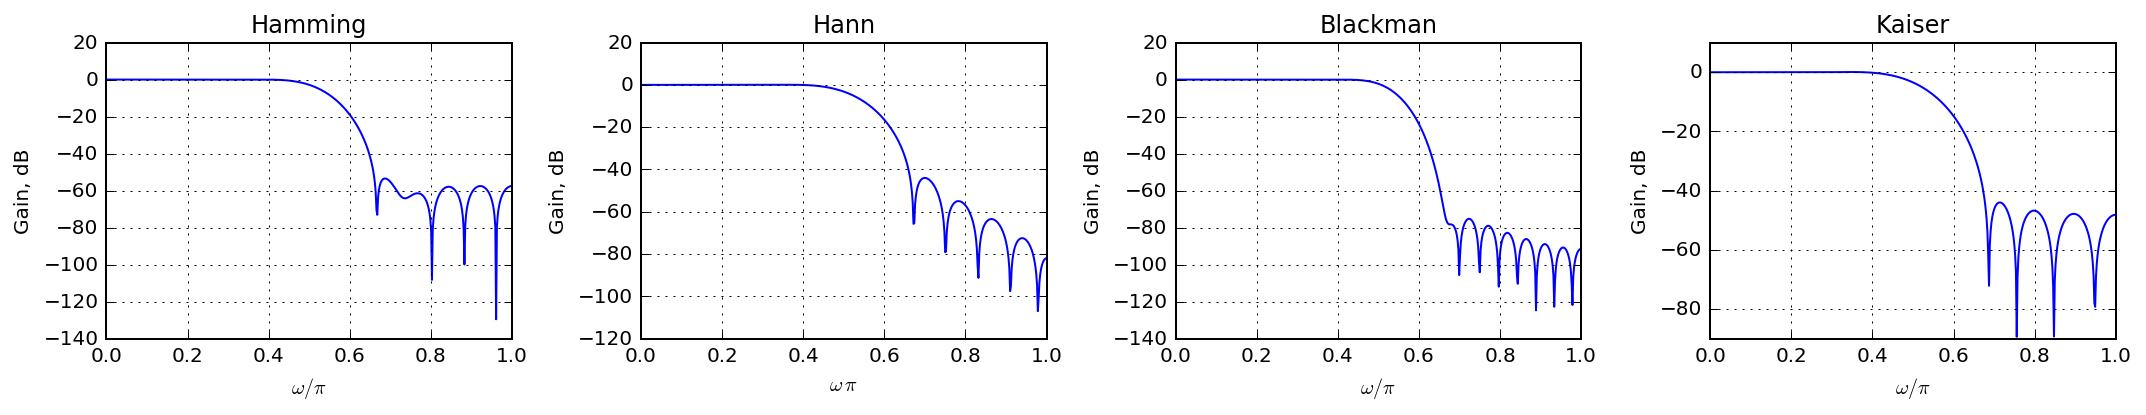

In [42]:
from scipy.signal import freqz
fig=plt.figure(figsize=(15,3));
subplot(1,4,1);
w, h = freqz(b_ham, 1)
plot(w/pi,20*log10(abs(h)));
grid();
xlabel('$\omega/\pi$');
ylabel('Gain, dB');
title('Hamming');
subplot(1,4,2);
w, h = freqz(b_han, 1)
plot(w/pi,20*log10(abs(h)));
grid();
xlabel('$\omega\/\pi$');
ylabel('Gain, dB');
title('Hann');
subplot(1,4,3);
w, h = freqz(b_blk, 1)
plot(w/pi,20*log10(abs(h)));
grid();
xlabel('$\omega/\pi$');
ylabel('Gain, dB');
title('Blackman');
subplot(1,4,4);
w, h = freqz(b_kai, 1)
plot(w/pi,20*log10(abs(h)));
grid();
xlabel('$\omega/\pi$');
ylabel('Gain, dB');
title('Kaiser');
fig.tight_layout()

## Question 2

Repeat the above problem by using Matlab command fir1. Use each of the following windows for the design: Hamming, Hann, Blackman and Kaiser. Show the impulse response coefficients, and plot the gain response of the designed filters for each case. Compare your results with those obtained in 1.

In [43]:
%%octave -o b_blk,b_han,b_ham,b_kai
pkg load signal
a_p=0.3;
a_s=40;
w_p=3/15*2*pi
w_s=5/15*2*pi
w_c=(w_p+w_s)/2
dw =w_s-w_p
M_hamming=3.32*pi/dw
M_hann=3.11*pi/dw
M_blackman=5.56*pi/dw
N_kaiser=(a_s-8)/(2.285*dw)
beta_kaiser=0.5842*(a_s-21)^0.4+0.07886*(a_s-21)

M=ceil(M_blackman);
b_blk=fir1(2*M,[w_c/(pi)],'low',blackman(2*M+1))';
M=ceil(M_hann);
b_han=fir1(2*M,[w_c/(pi)],'low',hann(2*ceil(M_hann)+1))';
M=ceil(M_hamming);
b_ham=fir1(2*M,[w_c/(pi)],'low',hamming(2*ceil(M_hamming)+1))';
M=8;
b_kai=fir1(2*M,[w_c/(pi)],'low',kaiser(ceil(N_kaiser),beta_kaiser))';

w_p =  1.2566
w_s =  2.0944
w_c =  1.6755
dw =  0.83776
M_hamming =  12.450
M_hann =  11.663
M_blackman =  20.850
N_kaiser =  16.716
beta_kaiser =  3.3953

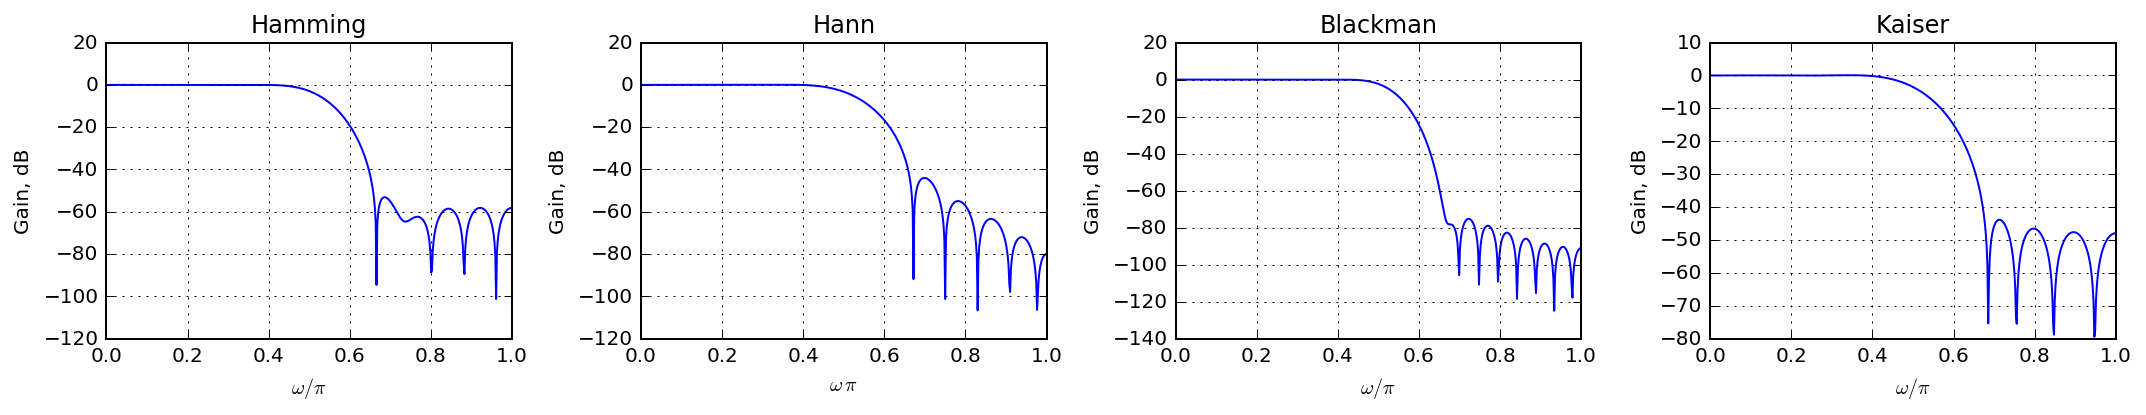

In [44]:
from scipy.signal import freqz
fig=plt.figure(figsize=(15,3));
subplot(1,4,1);
w, h = freqz(b_ham, 1)
plot(w/pi,20*log10(abs(h)));
grid();
xlabel('$\omega/\pi$');
ylabel('Gain, dB');
title('Hamming');
subplot(1,4,2);
w, h = freqz(b_han, 1)
plot(w/pi,20*log10(abs(h)));
grid();
xlabel('$\omega\/\pi$');
ylabel('Gain, dB');
title('Hann');
subplot(1,4,3);
w, h = freqz(b_blk, 1)
plot(w/pi,20*log10(abs(h)));
grid();
xlabel('$\omega/\pi$');
ylabel('Gain, dB');
title('Blackman');
subplot(1,4,4);
w, h = freqz(b_kai, 1)
plot(w/pi,20*log10(abs(h)));
grid();
xlabel('$\omega/\pi$');
ylabel('Gain, dB');
title('Kaiser');
fig.tight_layout()

## Question 3

Using the windowed Fourier series approach, design a linear-phase FIR lowpass filter of lowest order with the following specifications: passband edge $0.3\pi$, stopband edge at $0.4\pi$, and minimum stopband attenuation of 42 dB. Which window function is appropriate for this design? Show the impulse response coefficients, and plot the gain response of the designed filter. Comment on your results. Do not use the M-file fir1.

In [78]:
%%octave -o b_blk,b_han,b_ham,b_kai,N_kaiser
pkg load signal
a_p=0.3;
a_s=42;
w_p=0.3*pi
w_s=0.4*pi
w_c=(w_p+w_s)/2
dw =w_s-w_p
M_hamming=3.32*pi/dw
M_hann=3.11*pi/dw
M_blackman=5.56*pi/dw
N_kaiser=(a_s-8)/(2.285*dw)
beta_kaiser=0.5842*(a_s-21)^0.4+0.07886*(a_s-21)
function ft = lpfil(M,w_c)
    fbb = sin(w_c*[-M:M])./(pi*[-M:M]);
    fbb(M+1)=w_c/pi;
    ft = fbb;
end


M=ceil(M_blackman);
b_blk=lpfil(M,w_c)'.*blackman(2*M+1);
M=ceil(M_hann);
b_han=lpfil(M,w_c)'.*hann(2*ceil(M_hann)+1);
M=ceil(M_hamming);
b_ham=lpfil(M,w_c)'.*hamming(2*ceil(M_hamming)+1);
M=24;
b_kai=lpfil(M,w_c)'.*kaiser(ceil(N_kaiser)+1,beta_kaiser);

w_p =  0.94248
w_s =  1.2566
w_c =  1.0996
dw =  0.31416
M_hamming =  33.200
M_hann =  31.100
M_blackman =  55.600
N_kaiser =  47.363
beta_kaiser =  3.6305

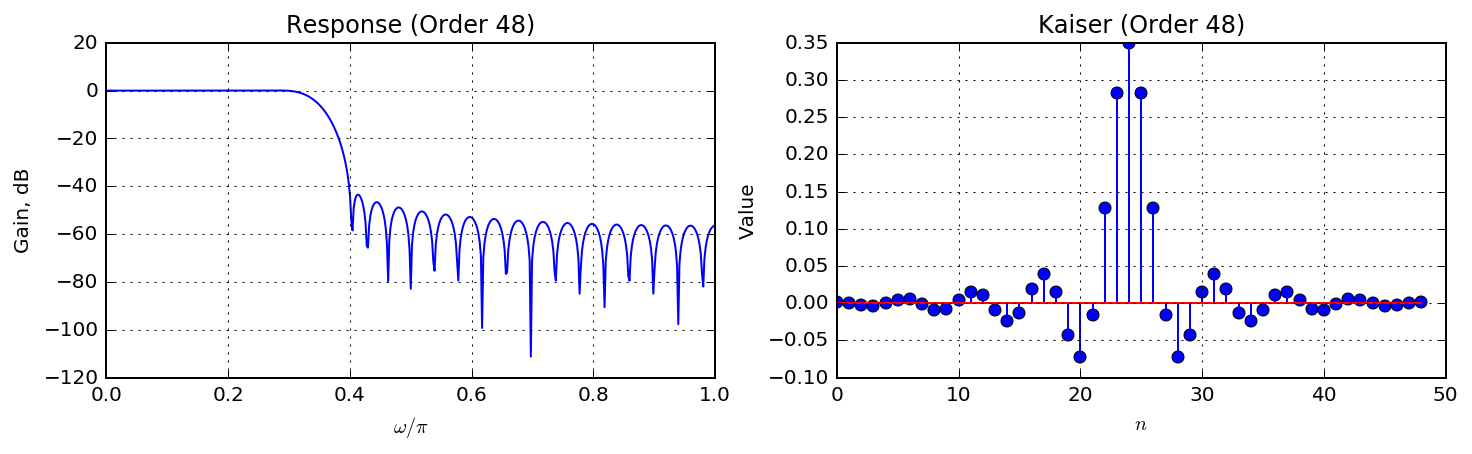

In [79]:
from scipy.signal import freqz
fig=plt.figure(figsize=(12,3));
subplot(1,2,1);
w, h = freqz(b_kai, 1);
plot(w/pi,20*log10(abs(h)));
grid();
xlabel('$\omega/\pi$');
ylabel('Gain, dB');
title(('Response (Order %i)') % (ceil(N_kaiser)));
subplot(1,2,2);
stem(b_kai);
grid();
xlabel('$n$');
ylabel('Value');
title(('Kaiser (Order %i)') % (ceil(N_kaiser)));


## Question 4

Repeat problem 1 using the M-file fir1. Compare your results with those obtained in 1.

In [75]:
%%octave -o b_blk,b_han,b_ham,b_kai,N_kaiser
pkg load signal
a_p=0.3;
a_s=42;
w_p=0.3*pi
w_s=0.4*pi
w_c=(w_p+w_s)/2
dw =w_s-w_p
M_hamming=3.32*pi/dw
M_hann=3.11*pi/dw
M_blackman=5.56*pi/dw
N_kaiser=(a_s-8)/(2.285*dw)
beta_kaiser=0.5842*(a_s-21)^0.4+0.07886*(a_s-21)
function ft = lpfil(M,w_c)
    fbb = sin(w_c*[-M:M])./(pi*[-M:M]);
    fbb(M+1)=w_c/pi;
    ft = fbb;
end


M=ceil(M_blackman);
b_blk=fir1(2*M,[w_c/(pi)],'low',blackman(2*M+1))';
M=ceil(M_hann);
b_han=fir1(2*M,[w_c/(pi)],'low',hann(2*ceil(M_hann)+1))';
M=ceil(M_hamming);
b_ham=fir1(2*M,[w_c/(pi)],'low',hamming(2*ceil(M_hamming)+1))';

b_kai=fir1(47,[w_c/(pi)],'low',kaiser(ceil(N_kaiser),beta_kaiser))';

w_p =  0.94248
w_s =  1.2566
w_c =  1.0996
dw =  0.31416
M_hamming =  33.200
M_hann =  31.100
M_blackman =  55.600
N_kaiser =  47.363
beta_kaiser =  3.6305

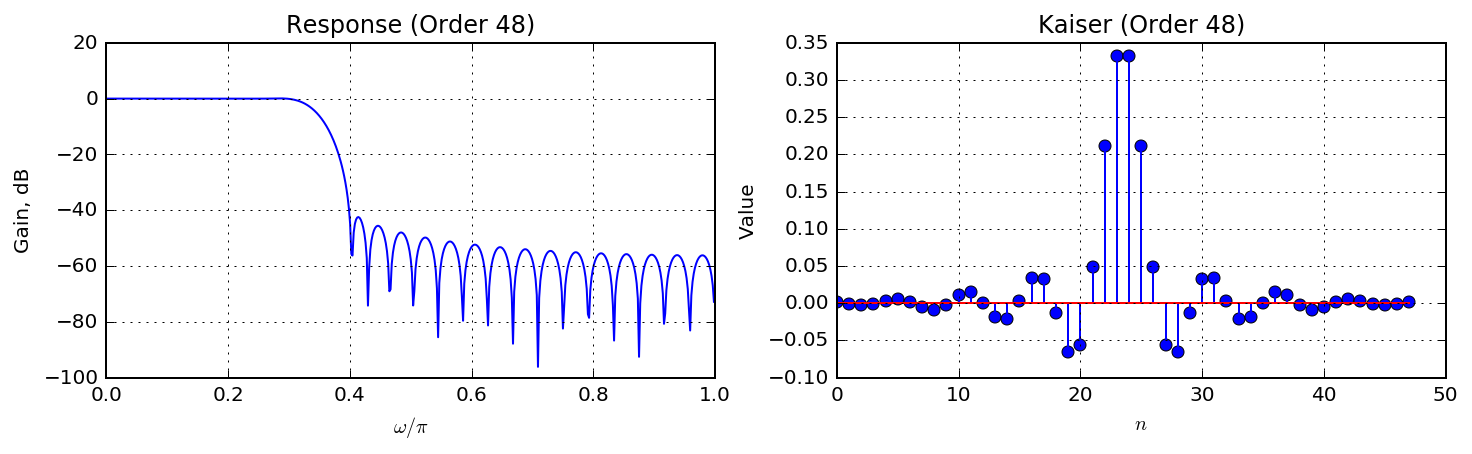

In [76]:
from scipy.signal import freqz
fig=plt.figure(figsize=(12,3));
subplot(1,2,1);
w, h = freqz(b_kai, 1);
plot(w/pi,20*log10(abs(h)));
grid();
xlabel('$\omega/\pi$');
ylabel('Gain, dB');
title(('Response (Order %i)') % (ceil(N_kaiser)));
subplot(1,2,2);
stem(b_kai);
grid();
xlabel('$n$');
ylabel('Value');
title(('Kaiser (Order %i)') % (ceil(N_kaiser)));
